<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-18 15:22:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  63.6MB/s    in 3.2s    

2025-11-18 15:22:53 (63.6 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 180.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 184.0 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 133.5 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed, full-time                     

#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [8]:
# Disabling scientific notation globally in Pandas
pd.set_option('display.float_format', '{:,.2f}'.format)

In [9]:
df['CompTotal'].describe()

count                                            33,740.00
mean    29,638,411,381,149,976,434,844,996,221,255,135,...
std     5,444,117,135,142,297,852,662,284,923,089,891,0...
min                                                   0.00
25%                                              60,000.00
50%                                             110,000.00
75%                                             250,000.00
max     1,000,000,000,000,000,162,545,277,246,339,097,2...
Name: CompTotal, dtype: float64

In [10]:
#filtering the data in the CompTotal column 1-99%
low = df['CompTotal'].quantile(0.01)
high = df['CompTotal'].quantile(0.99)
df['CompFiltered'] = df['CompTotal'][(df['CompTotal']>=low)& (df['CompTotal']<=high)]

df['CompFiltered']=df['CompFiltered'].astype('float')
df['CompFiltered'].describe()

count        33,066.00
mean      1,063,075.68
std       5,979,678.83
min             900.00
25%          60,000.00
50%         110,000.00
75%         247,105.00
max     117,600,000.00
Name: CompFiltered, dtype: float64

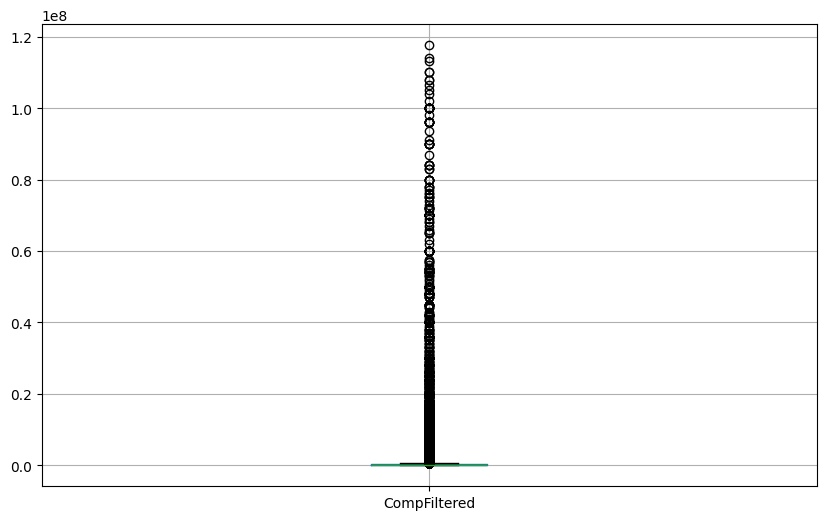

In [11]:
df.boxplot(column = 'CompFiltered',figsize = (10,6))
plt.show()

In [12]:
#filtering the data in the CompTotal column 5-95%
low = df['CompTotal'].quantile(0.05)
high = df['CompTotal'].quantile(0.95)
df['CompFiltered'] = df['CompTotal'][(df['CompTotal']>=low)& (df['CompTotal']<=high)]

df['CompFiltered']=df['CompFiltered'].astype('float')
df['CompFiltered'].describe()

count      30,448.00
mean      293,681.61
std       521,807.92
min        18,000.00
25%        61,000.00
50%       110,000.00
75%       220,000.00
max     3,600,000.00
Name: CompFiltered, dtype: float64

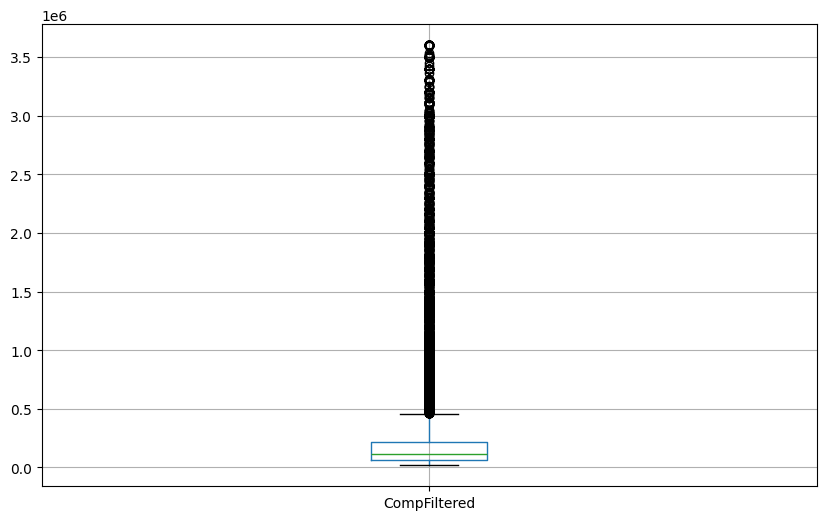

In [13]:
# your code goes here
df.boxplot(column = 'CompFiltered',figsize = (10,6))
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [14]:
# your code goes here
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [15]:
df['Age'].isnull().sum()

np.int64(0)

In [16]:
%pip install numpy 
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [17]:
#defining a function to convert the Age column to numeric values

def Age_to_numeric(v):
    if pd.isna(v):
        return np.nan

    elif '25-34 years old' in v:
        return 30
    elif '35-44 years old' in v:
        return 40
    elif '18-24 years old' in v:
        return 22
    elif '45-54 years old' in v:
        return 50
    elif '55-64 years old' in v:
        return 60
    elif 'Under 18 years old' in v:
        return 17
    elif '65 years or older' in v:
        return 67
    elif  'Prefer not to say' in v:
        return 41 #the mean of the other values. 

#applying the function to the age Column and verifying that it worked. 
df['Age_numeric'] = df['Age'].apply(Age_to_numeric)
df['Age_numeric'].describe()

count   65,437.00
mean        33.63
std         10.97
min         17.00
25%         22.00
50%         30.00
75%         40.00
max         67.00
Name: Age_numeric, dtype: float64

In [18]:
df['Age_numeric']

0        17
1        40
2        50
3        22
4        22
         ..
65432    22
65433    30
65434    30
65435    22
65436    22
Name: Age_numeric, Length: 65437, dtype: int64

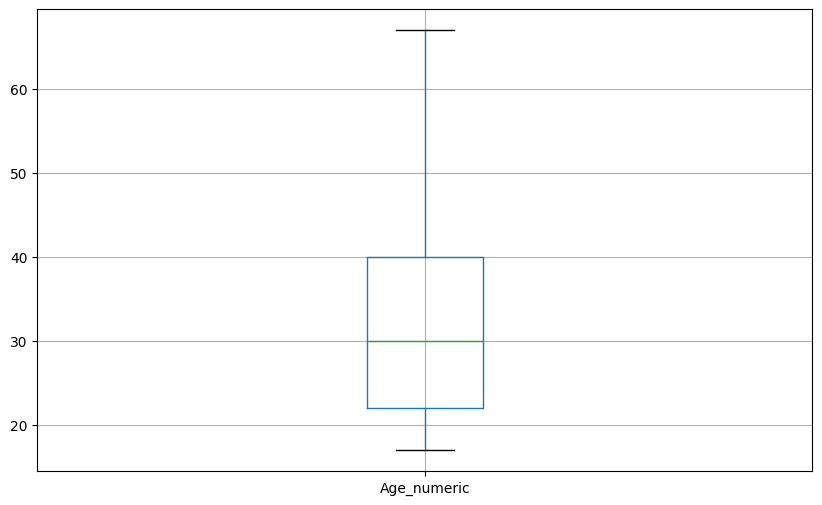

In [19]:
df.boxplot(column = 'Age_numeric', figsize = (10,6))
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


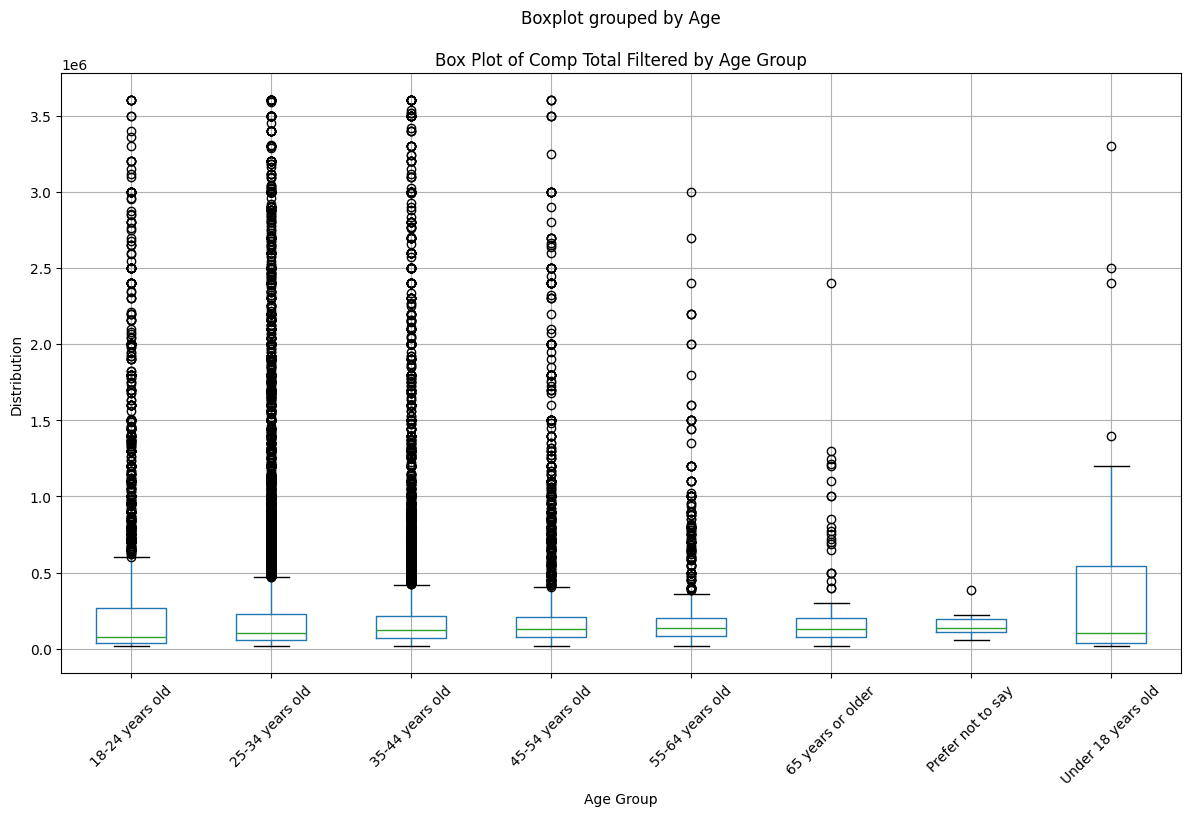

In [20]:
# your code goes here
df.boxplot(column = 'CompFiltered', by = 'Age', figsize = (14,8))
plt.xticks(rotation=45)
plt.title('Box Plot of Comp Total Filtered by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Distribution')

plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


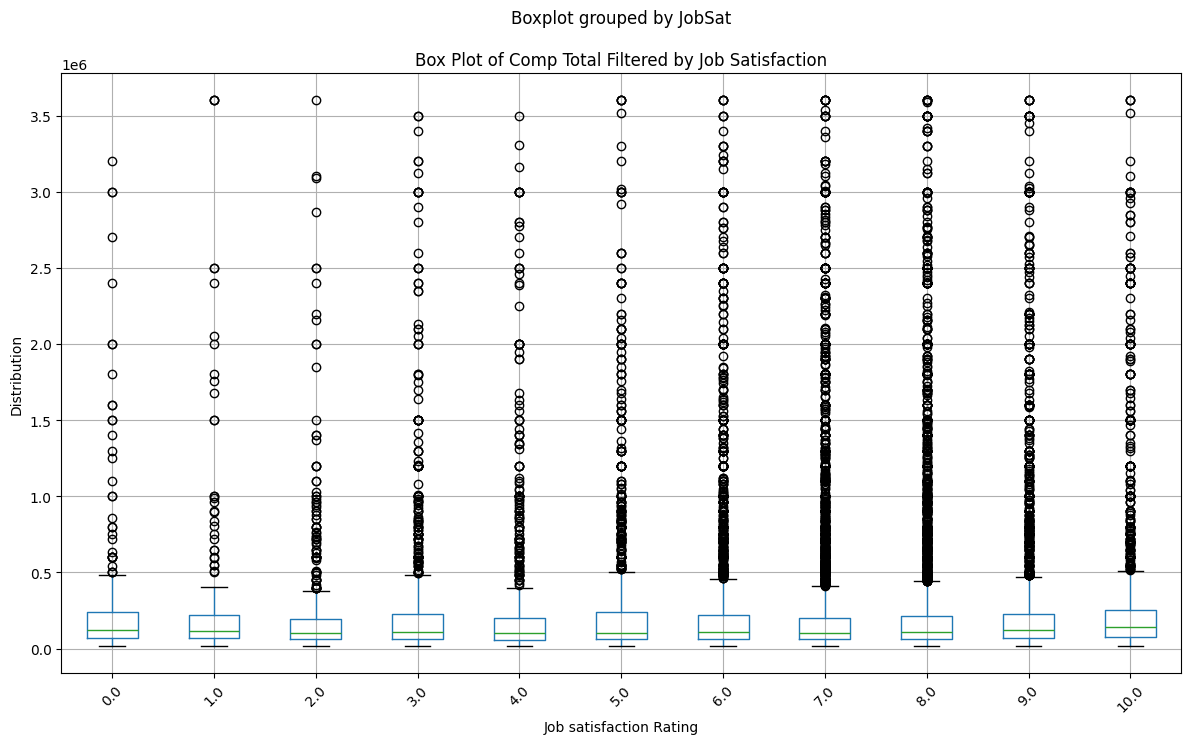

In [21]:
# your code goes here
df.boxplot(column = 'CompFiltered', by = 'JobSat', figsize = (14,8))
plt.xticks(rotation=45)
plt.title('Box Plot of Comp Total Filtered by Job Satisfaction')
plt.xlabel('Job satisfaction Rating')
plt.ylabel('Distribution')

plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [26]:
#filtering the data in the ConvertedCompYearly column 1-99%
low = df['ConvertedCompYearly'].quantile(0.01)
high = df['ConvertedCompYearly'].quantile(0.99)
df['CompYearlyFiltered'] = df['ConvertedCompYearly'][(df['ConvertedCompYearly']>=low)& (df['ConvertedCompYearly']<=high)]

df['CompYearlyFiltered']=df['CompYearlyFiltered'].astype('float')
df['CompYearlyFiltered'].describe()

count    22,965.00
mean     78,606.22
std      61,963.64
min         209.00
25%      33,758.00
50%      65,000.00
75%     107,406.00
max     386,662.00
Name: CompYearlyFiltered, dtype: float64

In [27]:
# your code goes here - ConvertedCompYearly
dev_counts = df['DevType'].value_counts().head(5).index
dev_counts


Index(['Developer, full-stack', 'Developer, back-end', 'Student',
       'Developer, front-end',
       'Developer, desktop or enterprise applications'],
      dtype='object', name='DevType')

In [28]:
top5_df = df[df['DevType'].isin(dev_counts)]
top5_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,CompFiltered,Age_numeric,CompYearlyFiltered
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00,0.00,0.00,None,None,NaN,NaN,NaN,40,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,Too long,Easy,NaN,NaN,NaN,22,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,Too short,Easy,NaN,NaN,NaN,22,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",None,Apples,None,Primary/elementary school,"School (i.e., University, College, etc);Online...",None,...,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,NaN,17,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN,NaN,22,NaN


<Figure size 2000x1200 with 0 Axes>

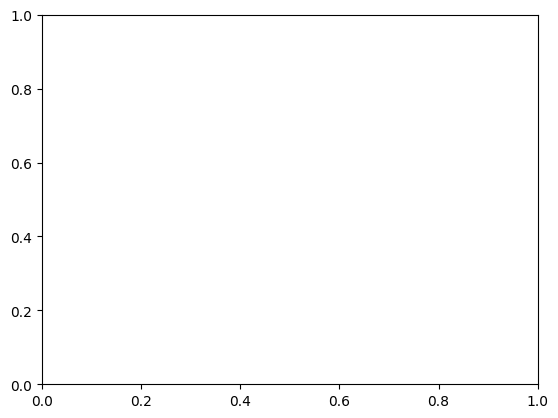

<Figure size 2000x1200 with 0 Axes>

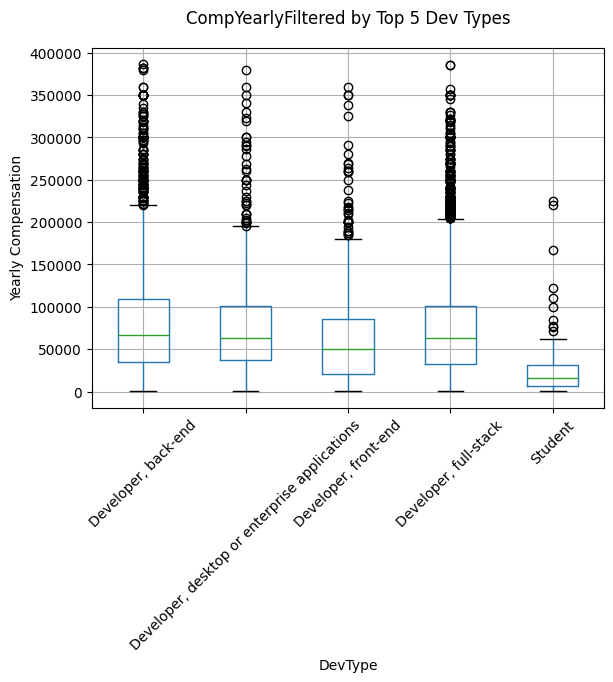

In [29]:
plt.figure(figsize=(20,12)) 
top5_df.boxplot(column = 'CompYearlyFiltered', by = 'DevType', rot = 45)
plt.title('')              # Remove automatic pandas title
plt.suptitle('CompYearlyFiltered by Top 5 Dev Types')
plt.ylabel('Yearly Compensation')
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [30]:
# your code goes here
top5_countries = df['Country'].value_counts().head(5).index
top5_countries

Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Ukraine'],
      dtype='object', name='Country')

In [31]:
#creating a new df with only entries that are from the top 5 countries
df_countries = df[df['Country'].isin(top5_countries)]
df_countries.shape

(26169, 117)

<Figure size 1000x600 with 0 Axes>

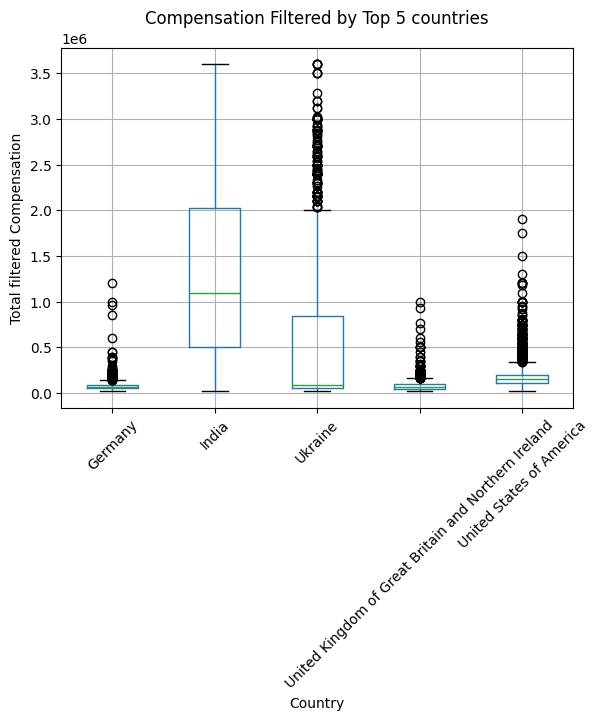

In [32]:
plt.figure(figsize = (10,6))
df_countries.boxplot(column='CompFiltered', by = 'Country', rot=45)
plt.title('')              # Remove automatic pandas title
plt.suptitle('Compensation Filtered by Top 5 countries')
plt.ylabel('Total filtered Compensation')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [34]:
# your code goes here
top5_emp = df['Employment'].value_counts().head(5).index
top5_emp

Index(['Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work'],
      dtype='object', name='Employment')

In [35]:
emp_df = df[df['Employment'].isin(top5_emp)]
emp_df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,CompFiltered,Age_numeric,CompYearlyFiltered
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,17,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00,0.00,0.00,None,None,NaN,NaN,NaN,40,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,NaN,50,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,Too long,Easy,NaN,NaN,NaN,22,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,Too short,Easy,NaN,NaN,NaN,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",None,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,22,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,None,None,None,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,30,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,30,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.00,0.00,0.00,None,None,NaN,NaN,NaN,22,NaN


<Figure size 1200x600 with 0 Axes>

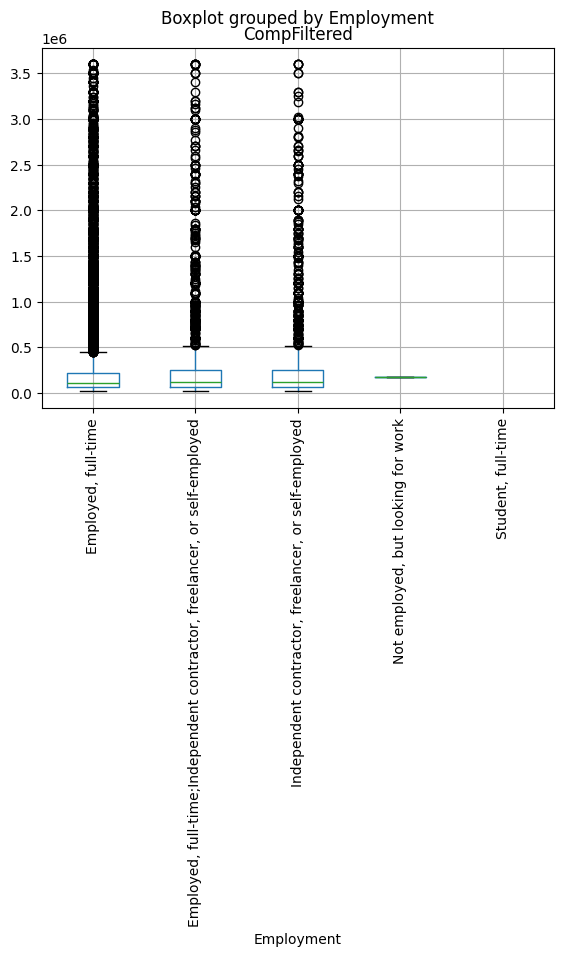

In [39]:
plt.figure(figsize = (12,6))
emp_df.boxplot(column = 'CompFiltered', by = 'Employment', rot = 90)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [41]:
## Standardizing the 'YearsCodePro' column before binning 
def clean_years_code_pro(val): # Creating a function to convert the str values into numeric values. 
    if pd.isnull(val): 
        return np.nan
    elif val == 'Less than 1 year':
        return 0
    elif val == 'More than 50 years':
        return 51 
    else:
        return float(val)

 #applying the function and assigning to a new column
df['YearsCodePro_clean'] = df['YearsCodePro'].apply(clean_years_code_pro) 

#Checking that my code worked as expected 
df['YearsCodePro_clean'].value_counts() 

YearsCodePro_clean
2.00     4168
3.00     4093
5.00     3526
10.00    3251
4.00     3215
0.00     2856
6.00     2843
1.00     2639
8.00     2549
7.00     2517
12.00    1777
15.00    1635
20.00    1549
9.00     1493
11.00    1312
13.00    1127
14.00    1082
25.00     998
16.00     946
18.00     867
17.00     814
30.00     689
24.00     632
19.00     516
22.00     492
23.00     448
26.00     426
27.00     380
21.00     380
28.00     342
35.00     285
29.00     196
40.00     194
32.00     194
34.00     169
38.00     134
33.00     132
36.00     119
31.00     106
37.00     104
45.00      56
42.00      55
39.00      54
41.00      51
51.00      50
44.00      42
43.00      37
46.00      21
50.00      14
48.00      14
49.00      11
47.00      10
Name: count, dtype: int64

<Figure size 3000x1800 with 0 Axes>

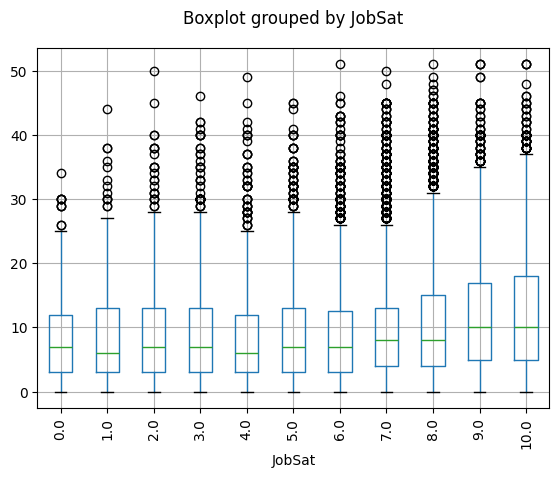

In [49]:

plt.figure(figsize=(30,18))
df.boxplot(column ='YearsCodePro_clean' , by ='JobSat' , rot = 90)
plt.title('')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
